## Q1. Simulation of Poisson Distribution - Discrete Inverse Transform.

In [27]:
using Pkg
Pkg.add("Distributions")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [28]:
using Random, Distributions

In [29]:
function poisson(λ)
    U = rand(Uniform(0,1))
    i = 0
    p = exp(-λ)
    A = p
    X = 0
    while true
        if U<A
            X = i
            break
        else 
            p = λ*(1/(1+i))*p 
            A = A + p
            i = i + 1
        end
    end
    
    return X
end

poisson (generic function with 1 method)

In [32]:
l = 10
b = Poisson(l)

test = rand(b,100000)

c = Int[]
for i in 1:100000
    append!(c, poisson(10))
end

mean = sum(c)/length(c)
variance = sum((c.-mean).^2)/length(c)
exp_mean = l
exp_variance = l
println("Mean = ", mean)
println("Variance = ", variance)
println("Expected Mean = ", exp_mean)
println("Expected Variance = ", exp_variance)


Mean = 10.00893
Variance = 9.963830255100003
Expected Mean = 10
Expected Variance = 10


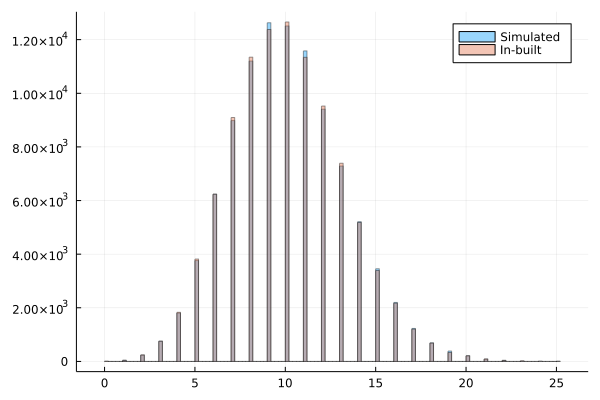

In [33]:
using Plots
histogram([c test], label = ["Simulated" "In-built"], seriesalpha = 0.4)

,

## Q2. Discrete Accept Reject Sampler to simulate draws from Binomial(n, p) using a Poisson proposal

,

In [34]:
function binomial(n,p)
    
    S = (n*(1-p) - Int(n*(1-p)) <= p)
    k = Int(n*(1-p))

    if S == 1
        y = (n*(1-p) - Int(n*(1-p)))/p
    else 
        y = 1
    end
    l = (k+y)*p/(1-p) #lambda (Reference : https://www.jstor.org/stable/2286346?seq=3)
    X = n - Int(l*(1-p)/p) # Value of X which results in maximum value of c.
    c = pdf(Binomial(n,p), X)/pdf(Poisson(l),X) # Using libraries for pdf of the distributions.


    while true
        U = rand(Uniform(0,1))
        X = rand(Poisson(l)) # Draw Proposal
        while X > n
            X = rand(Poisson(l))
        end
        dbino = pdf(Binomial(n,p), X)
        dpois = pdf(Poisson(l),X)
        
        ratio = dbino/(c*dpois)
        
        if U < ratio
            return X
        end
    end
end

binomial (generic function with 1 method)

In [35]:
n = 10
p = 0.5
b = Binomial(n,p)

test = rand(b,100000)

c = Int[]
for i in 1:100000
    append!(c, binomial(n,p))
end

mean = sum(c)/length(c)
variance = sum((c.-mean).^2)/length(c)
exp_mean = n*p
exp_variance = n*p*(1-p)
println("Mean = ", mean)
println("Variance = ", variance)
println("Expected Mean = ", exp_mean)
println("Expected Variance = ", exp_variance)

Mean = 4.99824
Variance = 2.5103369023999975
Expected Mean = 5.0
Expected Variance = 2.5


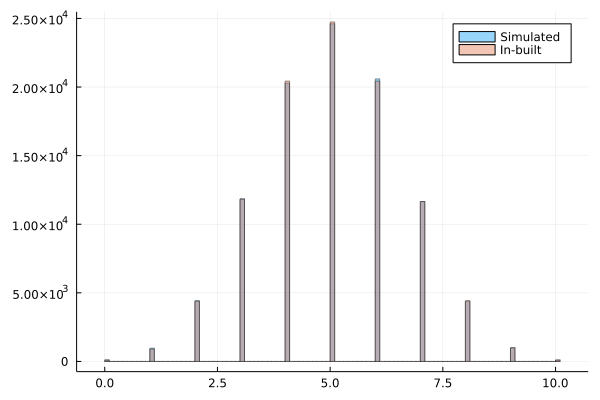

In [36]:
using Plots
histogram([c test], label = ["Simulated" "In-built"], seriesalpha = 0.4)